In [1]:
import pandas as pd
import numpy as np
from loguru import logger

# Plot step curves

## Validity

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


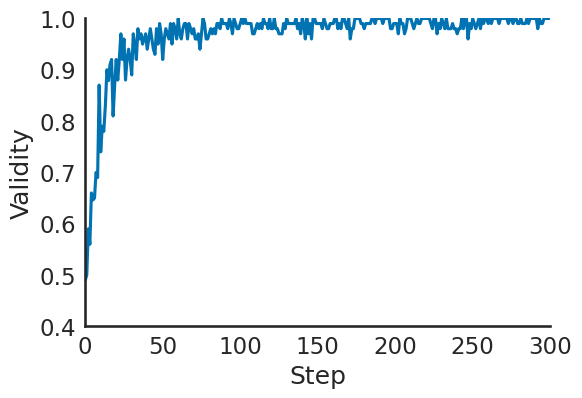

In [2]:
from utils import plot_style_utils

kras_step_300 = pd.read_csv('result/agent/kras_kd/kras_5.1_reinvent_cpl-a1_bs100_3000s_v2/all_step_aa_seqs_step300_valid.csv')
kras_step_300_valid = kras_step_300.groupby('step').agg({'is_valid': np.mean}).reset_index()

plot_style_utils.set_pub_plot_context(context="talk")
fig, ax = plot_style_utils.simple_ax()
plot_style_utils.prettify_ax(ax)

ax.plot(kras_step_300_valid['step'], kras_step_300_valid['is_valid'], label='Validity', color=plot_style_utils.CAT_PALETTE[0])
ax.set_xlim(0, 300)
ax.set_ylim(0.4, 1)
ax.set_xlabel('Step')
ax.set_ylabel('Validity')
plot_style_utils.save_for_pub(fig=fig, path='figures/kras_kd/step_validity')

## KRAS Kd

findfont: Font family ['Helvetica'] not found. Falling back to DejaVu Sans.


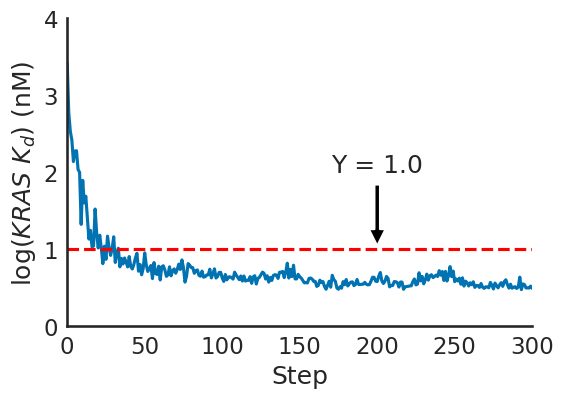

In [3]:
import matplotlib.pyplot as plt
from utils import plot_style_utils

kras_step_300_kras = kras_step_300.groupby('step').agg({'raw_kras_kd': np.mean}).reset_index()

plot_style_utils.set_pub_plot_context(context="talk")
fig, ax = plot_style_utils.simple_ax()
plot_style_utils.prettify_ax(ax)

ax.plot(kras_step_300_kras['step'], kras_step_300_kras['raw_kras_kd'], label='$\log (KRAS\ K_d)$ (nM)', color=plot_style_utils.CAT_PALETTE[0])

# draw horizontal line
ax.axhline(y=1, color='red', linestyle='--')
ax.annotate('Y = 1.0', xy=(200, 1), xytext=(200, 2), horizontalalignment="center", 
            arrowprops=dict(facecolor='black', shrink=0.05))
ax.set_xlim(0, 300)
ax.set_ylim(0, 4)
ax.set_xlabel('Step')
ax.set_ylabel('$\log (KRAS\ K_d)$ (nM)')
plot_style_utils.save_for_pub(fig=fig, path='figures/kras_kd/step_kras_kd')